<a href="https://colab.research.google.com/github/AkatsukiQAQ/private-use/blob/main/face.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Building Emvironment

In [1]:
!pip3 install retina-face bcolz-zipline mxnet tensorboardX

Install InsightFace

In [30]:
!rm -rf InsightFace_Pytorch

In [ ]:
!git clone --recursive https://github.com/deepinsight/insightface.git

Cloning into 'insightface'...
remote: Enumerating objects: 10448, done.
remote: Counting objects: 100% (826/826), done.
remote: Compressing objects: 100% (321/321), done.
remote: Total 10448 (delta 469), reused 758 (delta 450), pack-reused 9622
Receiving objects: 100% (10448/10448), 31.14 MiB | 27.00 MiB/s, done.
Resolving deltas: 100% (5702/5702), done.


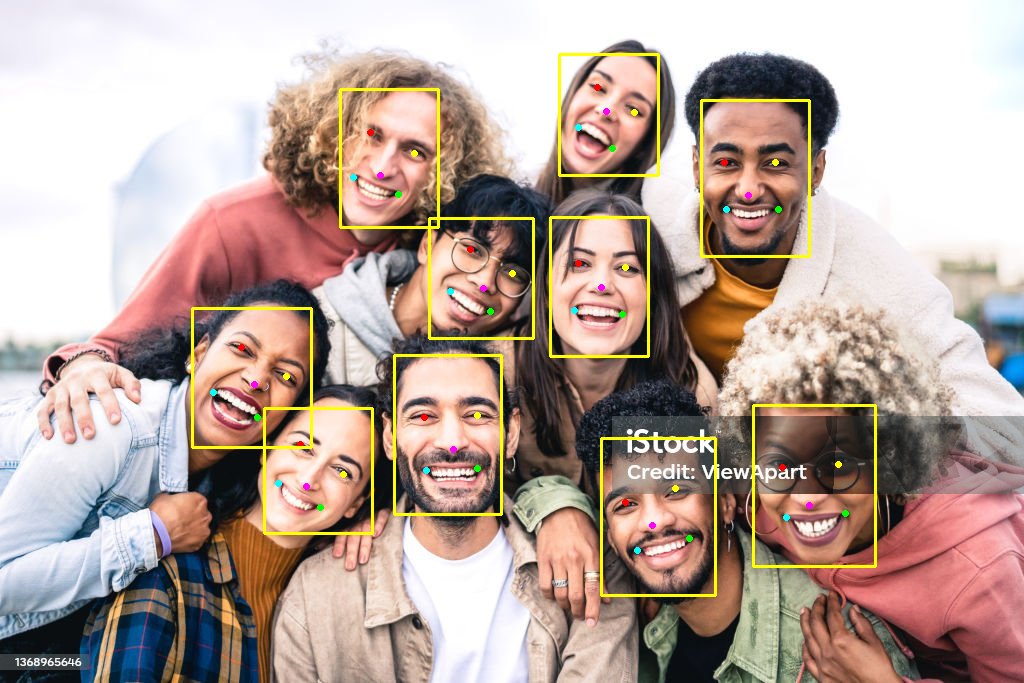

{'face_1': {'score': 0.9997747540473938, 'facial_area': [559, 54, 658, 175], 'landmarks': {'right_eye': [597.1181, 87.26121], 'left_eye': [634.6657, 112.96567], 'nose': [606.64923, 111.42748], 'mouth_right': [578.14386, 127.84656], 'mouth_left': [612.4668, 148.56151]}}, 'face_2': {'score': 0.9995144605636597, 'facial_area': [429, 218, 533, 338], 'landmarks': {'right_eye': [470.33163, 249.11784], 'left_eye': [512.4239, 273.14377], 'nose': [483.33176, 288.5404], 'mouth_right': [450.1223, 291.4826], 'mouth_left': [490.46634, 311.2558]}}, 'face_3': {'score': 0.9995065927505493, 'facial_area': [701, 100, 809, 256], 'landmarks': {'right_eye': [724.95807, 162.9476], 'left_eye': [775.4503, 162.3102], 'nose': [748.3903, 195.26575], 'mouth_right': [726.3099, 209.51302], 'mouth_left': [778.9376, 209.40367]}}, 'face_4': {'score': 0.9994743466377258, 'facial_area': [601, 438, 715, 595], 'landmarks': {'right_eye': [625.2349, 502.22147], 'left_eye': [675.52234, 488.46902], 'nose': [652.0994, 525.057]

In [ ]:
from google.colab.patches import cv2_imshow
from retinaface import RetinaFace
import cv2

img = cv2.imread('drive/MyDrive/datasets/face/sample.jpg')

result = RetinaFace.detect_faces(img)

for face in result.values():
  f = face['facial_area']
  l = face['landmarks']
  l_eye = (int(l['left_eye'][0]), int(l['left_eye'][1]))
  r_eye = (int(l['right_eye'][0]), int(l['right_eye'][1]))
  nose = (int(l['nose'][0]), int(l['nose'][1]))
  month_l = (int(l['mouth_left'][0]), int(l['mouth_left'][1]))
  month_r = (int(l['mouth_right'][0]), int(l['mouth_right'][1]))
  cv2.rectangle(img, (f[0], f[1]), (f[2], f[3]), (0, 255, 255), 2)
  cv2.circle(img, l_eye, 2, (0, 255, 255), 2)
  cv2.circle(img, r_eye, 2, (0, 0, 255), 2)
  cv2.circle(img, nose, 2, (255, 0, 255), 2)
  cv2.circle(img, month_l, 2, (0, 255, 0), 2)
  cv2.circle(img, month_r, 2, (255, 255, 0), 2)

cv2_imshow(img)

print(result)

In [ ]:
from torchvision import datasets
from torchvision import transforms

data_path = "drive/MyDrive/datasets/face/LFW"

train_data = datasets.LFWPeople(
    data_path,
    split='train',
    image_set='original',
    download=True,
    transform=transforms.ToTensor()
)

test_data = datasets.LFWPeople(
    data_path,
    split='test',
    image_set='original',
    download=True,
    transform=transforms.ToTensor()
)

print(train_data[0])
print(test_data[0])

In [2]:
import os, cv2, time
from retinaface import RetinaFace
from tqdm import tqdm

path = "drive/MyDrive/datasets/face/LFW/lfw-py/lfw"

people = os.listdir(path)
my_img = []
for p in tqdm(people):
  p_path = os.path.join(path, p)
  if os.path.isdir(p_path):
    pics = os.listdir(p_path)
    for pic in pics:
      if pic[-4:] == ".txt":
        continue
      img_path = os.path.join(p_path, pic)
      my_img.append(img_path)
      # img = cv2.imread(img_path)
      # result = RetinaFace.detect_faces(img)

      # for face in result.values():
      #   f = face['facial_area']
      #   l = face['landmarks']
      #   l_eye = (int(l['left_eye'][0]), int(l['left_eye'][1]))
      #   r_eye = (int(l['right_eye'][0]), int(l['right_eye'][1]))
      #   nose = (int(l['nose'][0]), int(l['nose'][1]))
      #   month_l = (int(l['mouth_left'][0]), int(l['mouth_left'][1]))
      #   month_r = (int(l['mouth_right'][0]), int(l['mouth_right'][1]))
      #   with open(img_path+".txt", 'w') as file:
      #     file.write("facial_area:" + f + '\n')
      #     file.write("")

      # with open(img_path[:-4] + '.txt', 'w') as outFile:
      #   outFile.write(str(result))
  else:
    continue

for i in tqdm(my_img):
  img = cv2.imread(i)
  result = RetinaFace.detect_faces(img)
  with open(i[:-4] + '.txt', 'w') as outFile:
    outFile.write(str(result))

  0%|          | 0/13233 [00:00<?, ?it/s]

24-02-14 04:10:05 - Directory /root/.deepface created
24-02-14 04:10:05 - Directory /root/.deepface/weights created
24-02-14 04:10:05 - retinaface.h5 will be downloaded from the url https://github.com/serengil/deepface_models/releases/download/v1.0/retinaface.h5


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/retinaface.h5
To: /root/.deepface/weights/retinaface.h5

  0%|          | 0.00/119M [00:00<?, ?B/s]
  1%|▏         | 1.57M/119M [00:00<00:08, 13.2MB/s]
  4%|▍         | 4.72M/119M [00:00<00:05, 21.9MB/s]
  8%|▊         | 9.96M/119M [00:00<00:03, 34.4MB/s]
 16%|█▌        | 18.9M/119M [00:00<00:01, 54.6MB/s]
 26%|██▌       | 30.9M/119M [00:00<00:01, 77.2MB/s]
 38%|███▊      | 44.6M/119M [00:00<00:00, 96.0MB/s]
 49%|████▉     | 58.2M/119M [00:00<00:00, 108MB/s] 
 60%|██████    | 71.3M/119M [00:00<00:00, 115MB/s]
 72%|███████▏  | 85.5M/119M [00:00<00:00, 123MB/s]
 84%|████████▍ | 99.6M/119M [00:01<00:00, 128MB/s]
100%|██████████| 119M/119M [00:01<00:00, 100MB/s]
100%|██████████| 13233/13233 [1:46:06<00:00,  2.08it/s]


Script

In [ ]:
%%shell

cd

python3 -m venv venv
source ~/venv/bin/activate

pip3 install --upgrade pip
pip3 install torch torchvision numpy matplotlib

cd ~/Projects
python reinforce_data.py